In [20]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import matplotlib.dates as mdates
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yaml
from fredapi import Fred


#settings
plt.style.use('fivethirtyeight')
#color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color#"]

## Load data
- USA source: https://fred.stlouisfed.org/graph/?g=8dGq  
- UK Source: https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23

In [91]:
#uk inflation
df_uk = pd.read_csv(r"../01 Inputs/uk_inflation.csv")
df_uk["Date"] = pd.to_datetime(df_uk["Date"])

#US inflation 
df_us = pd.read_csv(r"../01 Inputs/us_inflation.csv")
df_us["DATE"] = pd.to_datetime(df_us["DATE"])

## Inflation time series visualization

In [111]:
def plot_inflation_series():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = df_uk['Date'], 
                            y = df_uk['Inflation'], 
                            name = 'Uk Inflation', 
                            line=dict(color="#33CFA5")
                            )
                  )


    fig.add_trace(go.Scatter(x = df_us['DATE'], 
                            y = df_us['inflation'], 
                            name = 'US Inflation', 
                            line = dict(color = "#F06A6A")
                            )
                )

    fig.update_layout(autosize = False, width = 1200, height = 500)
    #add slider
    fig.layout.update(xaxis_rangeslider_visible = True)
    fig.update_xaxes(title_text = 'year')
    fig.update_yaxes(title_text = 'inflation %')


    fig.update_layout(
        updatemenus = [
            dict(
                active = 0, 
                buttons = list([
                    dict(label = "All", 
                        method = "update", 
                        args = [{"visible" : [True, True]}, 
                                {"title" : "title US", 
                                "annotations" : []}
                                ]
                        ),
                    dict(label = "Uk", 
                        method = "update", 
                        args = [{"visible" : [True, False]}, 
                                {"title" : "title", 
                                "annotations" : []}
                                ]
                        ), 
                    dict(label = "US", 
                        method = "update", 
                        args = [{"visible" : [False, True]}, 
                                {"title" : "title US", 
                                "annotations" : []}
                                ]
                        )
                                ])
            )
        ]
    )
    fig.show()

In [112]:
plot_inflation_series()

In [113]:
uk_heat = df_uk

In [124]:
uk_heat

,Date,Inflation,year,month,month_str
0,1989-01-01,5.7,1989,1,Jan
1,1989-02-01,5.8,1989,2,Feb
2,1989-03-01,5.9,1989,3,Mar
3,1989-04-01,5.6,1989,4,Apr
4,1989-05-01,5.9,1989,5,May
...,...,...,...,...,...
410,2023-03-01,8.9,2023,3,Mar
411,2023-04-01,7.8,2023,4,Apr
412,2023-05-01,7.9,2023,5,May
413,2023-06-01,7.3,2023,6,Jun


In [153]:
def inflation_matrix(df, date_col, inflation_col, years, country):
    df["year"] = pd.DatetimeIndex(df[date_col]).year
    df["month"] = pd.DatetimeIndex(df[date_col]).month
    df['month_str'] = df['month'].apply(lambda x: calendar.month_abbr[x])
    
    df = df.pivot_table(index = "year", columns = "month_str", values = inflation_col)
    df = df.sort_values(by = [ "year"], ascending = False)
    
    df = df[["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]].head(years)
    
    f, ax = plt.subplots(figsize=(16, 6))
    sns.heatmap(df, square = False, annot = True, cmap = "YlGnBu")
    ax.set_title(f'Monthly {country} Inflation %', fontsize = 16)
    ax.set_xlabel('Month', fontsize = 10)
    ax.set_ylabel('Year', fontsize = 10)
    
    plt.show()
    
    #return 10yrs worth of data
    #return df.head(10)
    

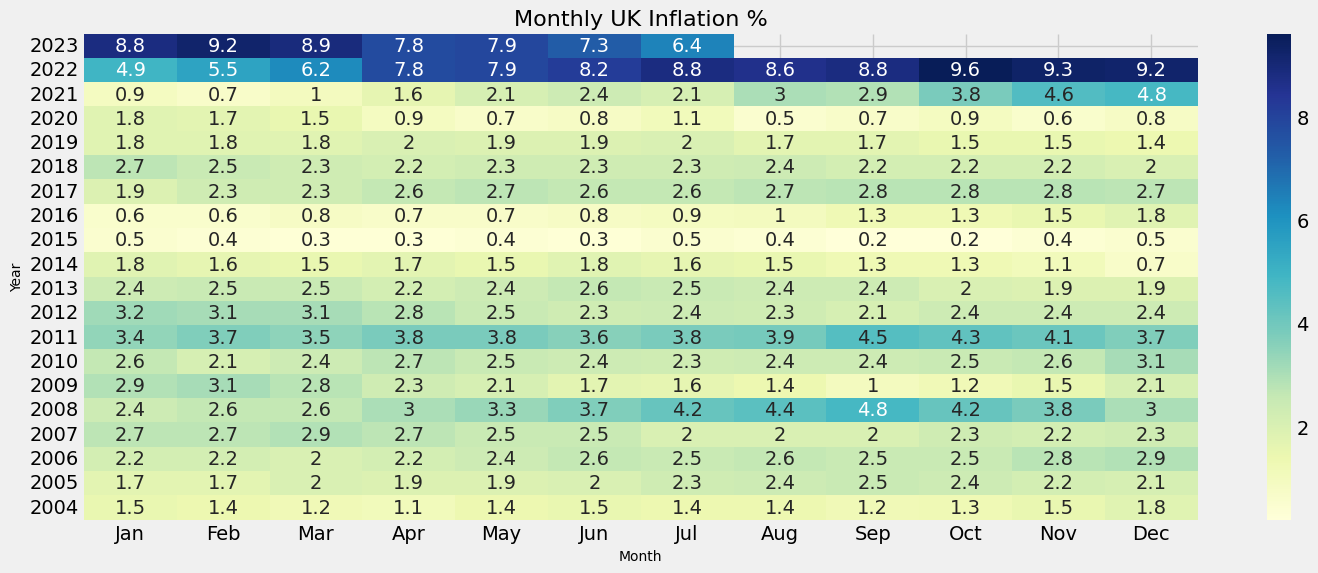

In [154]:
inflation_matrix(uk_heat, "Date", "Inflation", 20, "UK")

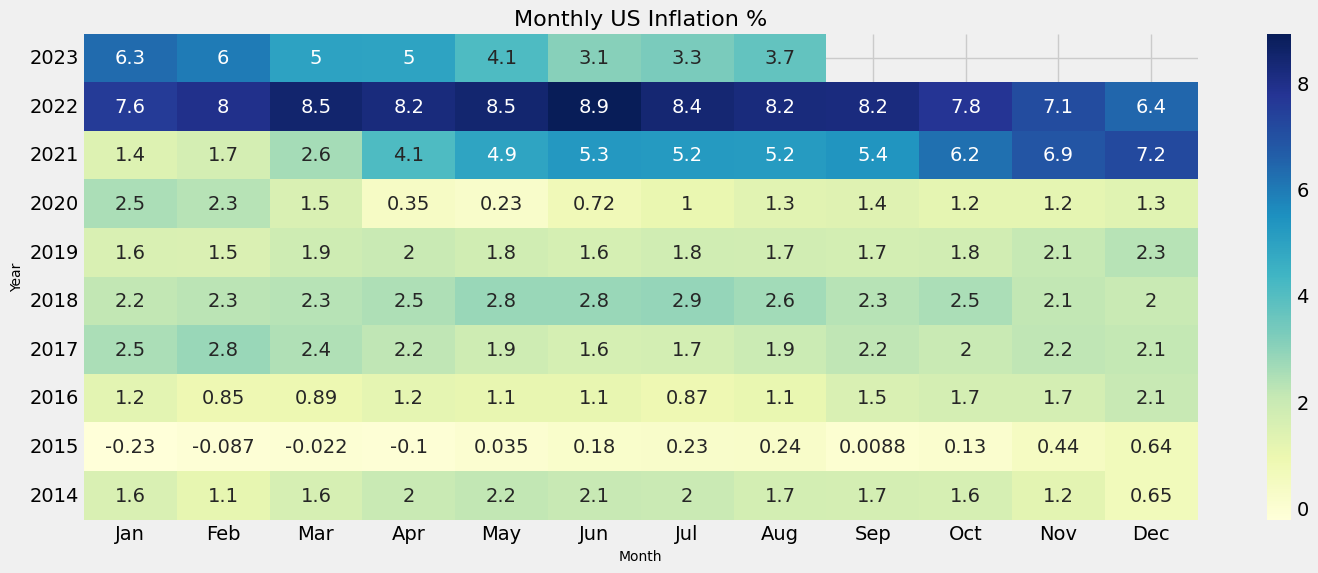

In [155]:
inflation_matrix(df_us, "DATE", "inflation", 10, "US")

## Future Improvements 
Aiming to use Api and load data automatically

In [82]:
with open("api_key.yaml") as file:
    fred_key = yaml.safe_load(file)
key = fred_key["key"]

fred = Fred(api_key = key)

#US data
us_inflation = fred.get_series("CPIAUCSL")
#transfrom into df
df_us = pd.DataFrame(us_inflation).reset_index()
df_us.columns = ["date", "inflation_rate"]

#data is yearly


C:\Users\criss\AppData\Local\Temp\ipykernel_16300\1756993916.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

